Bitcoin Price prediction using Facebook Prophet
==

This is a super simple price prediction based on historical closing values

In [13]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
#Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

![alt text](images/a.jpg "Prophet")

![alt text](images/b.jpg "Prophet")

In [26]:
## Importing the Dataset & Exploring it
btc = pd.read_csv('BTC-USD_daily_2015-07-20-Now.csv')
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    2160 non-null   object 
 1   low     2160 non-null   float64
 2   high    2160 non-null   float64
 3   open    2160 non-null   float64
 4   close   2160 non-null   float64
 5   volume  2160 non-null   float64
dtypes: float64(5), object(1)
memory usage: 101.4+ KB


In [27]:
btc.describe()

,low,high,open,close,volume
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,8494.111750,9098.106819,8816.664898,8834.720894,13390.965779
std,11737.343116,12657.919943,12238.988640,12255.238722,12051.780406
min,0.060000,229.240000,211.160000,211.160000,683.798071
25%,886.847500,923.435000,906.630000,908.500000,6047.622200
50%,6270.580000,6509.475000,6390.625000,6393.090000,9654.190797
75%,9339.092500,9839.872500,9613.285000,9613.385000,16681.975926
max,62036.730000,64899.000000,63588.220000,63588.220000,165542.811039


In [28]:
# Area graph (Date Vs Price)
px.area(btc, x='time', y='close')

In [30]:
# Violin plot
px.violin(btc, y='close')

In [35]:
# Creating Facebook Prophet Model
# Data Preperation
prophet_df = btc.rename(columns={'time': 'ds', 'close': 'y'})
prophet_df.drop(['low', 'high','open'], axis='columns', inplace=True)
prophet_df

,ds,y,volume
0,2015-07-20,280.00,782.883420
1,2015-07-21,277.32,4943.559434
2,2015-07-22,277.89,4687.909383
3,2015-07-23,277.39,5306.919575
4,2015-07-24,289.12,7362.469083
...,...,...,...
2155,2021-06-13,39015.24,15748.962040
2156,2021-06-14,40539.47,21916.844160
2157,2021-06-15,40162.37,17020.702995
2158,2021-06-16,38351.00,17238.575412


In [53]:
#m = Prophet()
#
m=Prophet(daily_seasonality=True,interval_width=0.95)
m.fit(prophet_df)

In [54]:
#future = m.make_future_dataframe(periods=30)
future=  m.make_future_dataframe(periods=365,freq='D')
future.tail()


,ds
2520,2022-06-13
2521,2022-06-14
2522,2022-06-15
2523,2022-06-16
2524,2022-06-17


In [55]:
forecast = m.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-20,588.460463,-6855.356208,8790.409041,588.460463,588.460463,383.226869,383.226869,383.226869,1244.633009,...,9.846098,9.846098,9.846098,-871.252238,-871.252238,-871.252238,0.0,0.0,0.0,971.687331
1,2015-07-21,580.749517,-7091.974333,8390.357531,580.749517,580.749517,341.792841,341.792841,341.792841,1244.633009,...,-8.133239,-8.133239,-8.133239,-894.706929,-894.706929,-894.706929,0.0,0.0,0.0,922.542358
2,2015-07-22,573.038571,-6284.461793,8365.843976,573.038571,573.038571,320.706769,320.706769,320.706769,1244.633009,...,-10.451097,-10.451097,-10.451097,-913.475143,-913.475143,-913.475143,0.0,0.0,0.0,893.745340
3,2015-07-23,565.327625,-7000.155167,8176.422528,565.327625,565.327625,289.486586,289.486586,289.486586,1244.633009,...,-27.492111,-27.492111,-27.492111,-927.654313,-927.654313,-927.654313,0.0,0.0,0.0,854.814211
4,2015-07-24,557.616679,-6693.521578,8517.806722,557.616679,557.616679,334.883830,334.883830,334.883830,1244.633009,...,27.680846,27.680846,27.680846,-937.430025,-937.430025,-937.430025,0.0,0.0,0.0,892.500509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,2022-06-13,90082.564057,67777.594813,110339.826821,68021.308967,109465.177437,-262.507416,-262.507416,-262.507416,1244.633009,...,9.846098,9.846098,9.846098,-1516.986523,-1516.986523,-1516.986523,0.0,0.0,0.0,89820.056642
2521,2022-06-14,90195.553785,66922.604063,110881.029152,68027.301451,109662.199629,-158.167209,-158.167209,-158.167209,1244.633009,...,-8.133239,-8.133239,-8.133239,-1394.666979,-1394.666979,-1394.666979,0.0,0.0,0.0,90037.386576
2522,2022-06-15,90308.543513,66839.474585,111305.272001,68033.293935,109859.221820,-35.437409,-35.437409,-35.437409,1244.633009,...,-10.451097,-10.451097,-10.451097,-1269.619322,-1269.619322,-1269.619322,0.0,0.0,0.0,90273.106104
2523,2022-06-16,90421.533241,68210.699400,110822.169860,68039.286419,110056.244012,73.290963,73.290963,73.290963,1244.633009,...,-27.492111,-27.492111,-27.492111,-1143.849936,-1143.849936,-1143.849936,0.0,0.0,0.0,90494.824204


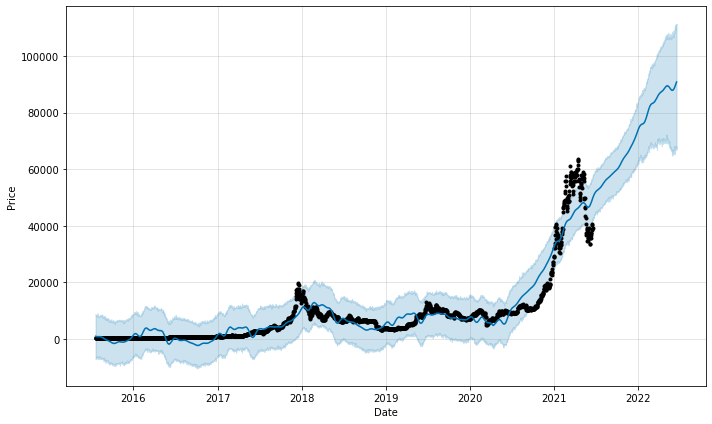

In [56]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

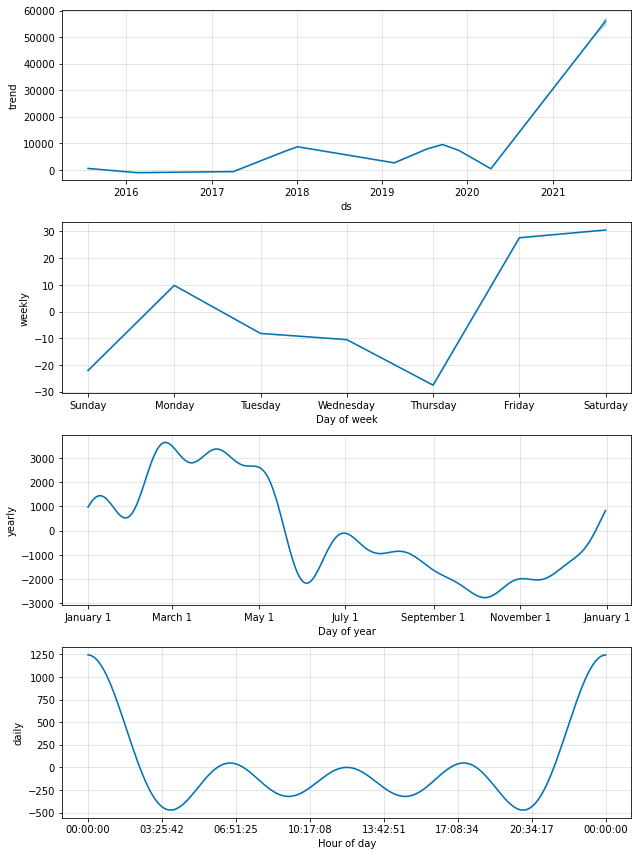

In [50]:
fig2 = m.plot_components(forecast)

In [43]:
#Downloading the Forecast data
forecast.to_csv('forecast.csv')

'[alt' is not recognized as an internal or external command,
operable program or batch file.
